# Nearest Neighbor Controller

In [1]:
import numpy as np
from MPCNet.dataset import dataset
from MPCNet.controller import neighbor_controller
from MPCNet.simulation import simulation

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
X_raw,y = dataset.Dataset.load('data6-500.csv')

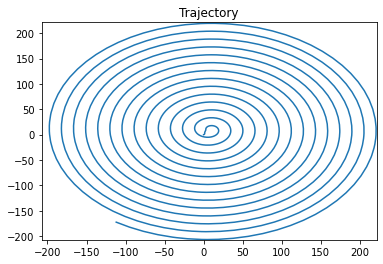

In [3]:
controllerClass = neighbor_controller.NeighborController(X_raw, y)
targetState = np.array([100, 100, 0, 0])

def controller(time, state):
    return controllerClass.getControl(state.T, targetState.T)

sim = simulation.Simulation(
       np.array([0.0, 0.0, 0.0, 0.0]),
       10.0,
       controller)

sim.runSimulation(100.0, quiet=True)
simulation.plotSimulation(sim)